In [141]:
#Description: This program uses the Bollinger Band strategy to determine when to buy and sell stock

In [142]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
plt.style.use('fivethirtyeight')
import yfinance as yf


In [143]:
#Load the data
# from google.colab import files # Use to load data on Google Colab
# files.upload() # Use to load data on Google Colab

In [159]:
#Store the data
ticker = "TSLA"
today = date.today ().strftime ("%Y-%m-%d")
# print(today)
# print(ticker)
df = yf.download(ticker, start="2016-01-04", end=today)
print (df)
print (df.dtypes)
# df = pd.read_csv('TSLA.csv')
# #Set the date as the index
#print(df['Date'])
# df = df.set_index(pd.DatetimeIndex(df['Date'].values))
# #Show the data
print(len(df))

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-04   46.144001   46.276001   43.799999   44.681999   44.681999   
2016-01-05   45.271999   45.377998   44.000000   44.686001   44.686001   
2016-01-06   44.000000   44.009998   43.195999   43.807999   43.807999   
2016-01-07   42.838001   43.688000   42.734001   43.130001   43.130001   
2016-01-08   43.571999   44.088001   42.153999   42.200001   42.200001   
...                ...         ...         ...         ...         ...   
2021-05-06  680.760010  681.020020  650.000000  663.539978  663.539978   
2021-05-07  665.799988  690.000000  660.219971  672.369995  672.369995   
2021-05-10  664.900024  665.049988  627.609985  629.039978  629.039978   
2021-05-11  599.239990  627.099976  595.599976  617.200012  617.200012   
2021-05-12  602.489990  620.409973  586.770

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-04   46.144001   46.276001   43.799999   44.681999   44.681999   
2016-01-05   45.271999   45.377998   44.000000   44.686001   44.686001   
2016-01-06   44.000000   44.009998   43.195999   43.807999   43.807999   
2016-01-07   42.838001   43.688000   42.734001   43.130001   43.130001   
2016-01-08   43.571999   44.088001   42.153999   42.200001   42.200001   
...                ...         ...         ...         ...         ...   
2021-05-06  680.760010  681.020020  650.000000  663.539978  663.539978   
2021-05-07  665.799988  690.000000  660.219971  672.369995  672.369995   
2021-05-10  664.900024  665.049988  627.609985  629.039978  629.039978   
2021-05-11  599.239990  627.099976  595.599976  617.200012  617.200012   
2021-05-12  602.489990  620.409973  586.770020  589.890015  589.890015   

              Volume         SMA     

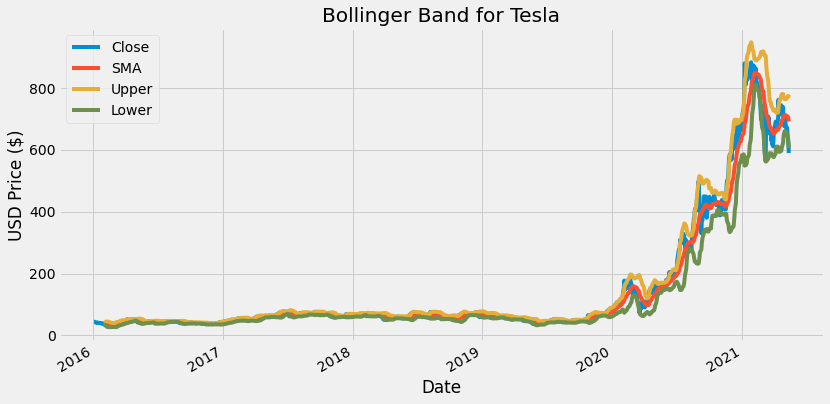

In [145]:
#Graph the data
#Get the time period (20 days)
period = 20
# Calculate the 20 Day Simple Moving Average, Std Deviation, Upper Band and Lower Band
#Calculating the Simple Moving Average
df['SMA'] = df['Close'].rolling(window=period).mean()
# Get the standard deviation
df['STD'] = df['Close'].rolling(window=period).std()
#Calculate the Upper Bollinger Band
df['Upper'] = df['SMA'] + (df['STD'] * 2)
#Calculate the Lower Bollinger Band
df['Lower'] = df['SMA'] - (df['STD'] * 2)
#Create a list of columns to keep
column_list = ['Close', 'SMA', 'Upper', 'Lower']
df[column_list].plot(figsize=(12.2,6.4)) #Plot the data
print(df)
plt.title('Bollinger Band for Tesla')
plt.ylabel('USD Price ($)')
plt.show();

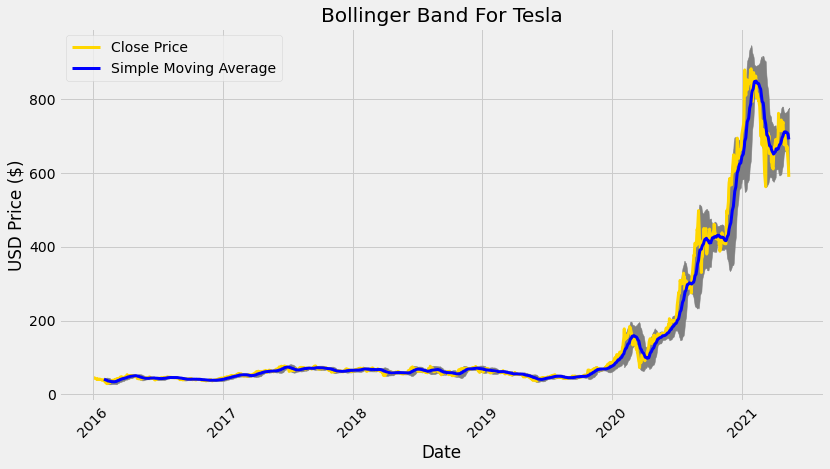

In [146]:
#Plot and shade the area between the two Bollinger bands
#Get the figure and the figure size
fig = plt.figure(figsize=(12.2,6.4)) #width = 12.2 inches and height = 6.4 inches
#Add the subplot
ax = fig.add_subplot(1,1,1) #Number of rows, cols, & index
# Get the index values of the DataFrame
x_axis = df.index
# Plot and shade the area between the upper band and the lower band Grey
ax.fill_between(x_axis, df['Upper'], df['Lower'], color='grey')
# Plot the Closing Price and Moving Average
ax.plot(x_axis, df['Close'], color='gold', lw=3, label = 'Close Price') #lw = line width
ax.plot(x_axis, df['SMA'], color='blue', lw=3, label = 'Simple Moving Average')
# Set the Title & Show the Image
ax.set_title('Bollinger Band For Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation = 45)
ax.legend()
plt.show();

In [153]:
#Create a new data frame
new_df = df[period-1:]
print (new_df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-02-01   37.751999   39.903999   36.549999   39.388000   39.388000   
2016-02-02   38.484001   38.624001   36.046001   36.556000   36.556000   
2016-02-03   36.717999   36.787998   34.035999   34.695999   34.695999   
2016-02-04   34.139999   35.195999   33.397999   35.066002   35.066002   
2016-02-05   34.259998   34.599998   31.548000   32.520000   32.520000   
...                ...         ...         ...         ...         ...   
2021-05-06  680.760010  681.020020  650.000000  663.539978  663.539978   
2021-05-07  665.799988  690.000000  660.219971  672.369995  672.369995   
2021-05-10  664.900024  665.049988  627.609985  629.039978  629.039978   
2021-05-11  599.239990  627.099976  595.599976  617.200012  617.200012   
2021-05-12  602.489990  620.409973  586.770020  589.890015  589.890015   

              Volume         SMA     

In [148]:
# Create a function to get the buy and sell signals
def get_signal(data):
  buy_signal = [] #buy list
  sell_signal = [] #sell list
  for i in range(len(data['Close'])):
    if data['Close'][i] > data['Upper'][i]: #Then you should sell
      #print('SELL')
      buy_signal.append(np.nan)
      sell_signal.append(data['Close'][i])
    elif data['Close'][i] < data['Lower'][i]: #Then you should buy
      #print('BUY')
      sell_signal.append(np.nan)
      buy_signal.append(data['Close'][i])
    else:
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)
  return (buy_signal, sell_signal)

In [152]:
new_df['Buy'] =  get_signal(new_df)[0]
new_df['Sell'] =  get_signal(new_df)[1]

<ipython-input-152-4e2eeb7c72af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Buy'] =  get_signal(new_df)[0]
<ipython-input-152-4e2eeb7c72af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Sell'] =  get_signal(new_df)[1]


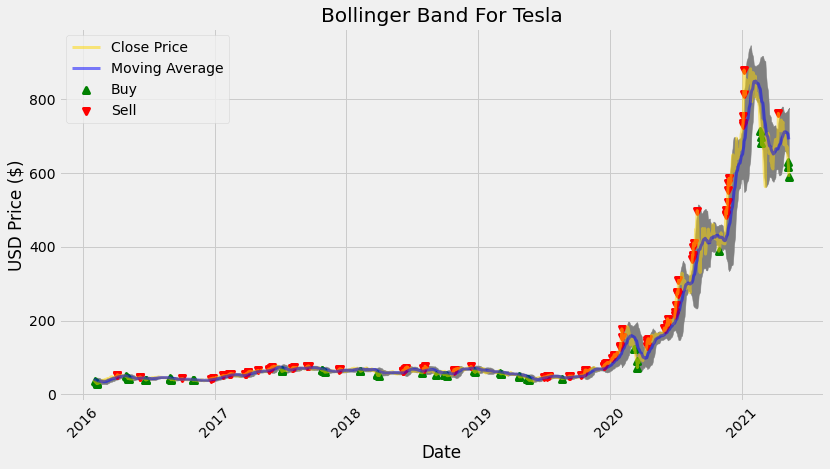

In [150]:
#Plot all of the data
#Get the figure and the figure size
fig = plt.figure(figsize=(12.2,6.4)) #width = 12.2 inches and height = 6.4 inches
#Add the subplot
ax = fig.add_subplot(1,1,1) #Number of rows, cols, & index
# Get the index values of the DataFrame
x_axis = new_df.index
# Plot and shade the area between the upper band and the lower band Grey
ax.fill_between(x_axis, new_df['Upper'], new_df['Lower'], color='grey')
# Plot the Closing Price and Moving Average
ax.plot(x_axis, new_df['Close'], color='gold', lw=3, label = 'Close Price',alpha = 0.5)
ax.plot(x_axis, new_df['SMA'], color='blue', lw=3, label = 'Moving Average',alpha = 0.5)
ax.scatter(x_axis, new_df['Buy'] , color='green', lw=3, label = 'Buy',marker = '^', alpha = 1)
ax.scatter(x_axis, new_df['Sell'] , color='red', lw=3, label = 'Sell',marker = 'v', alpha = 1)
# Set the Title & Show the Image
ax.set_title('Bollinger Band For Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation = 45)
ax.legend()
plt.show();